In [24]:
import nltk

text = "Status quo is a Latin phrase meaning the existing state of affairs, particularly with regards to social or political issues. In the sociological sense, it generally applies to maintain or change existing social structure and values. It is the nominal form of the prepositional Latin phrase in statu quo – literally in the state in which, which itself is a shortening of the original phrase in statu quo res erant ante bellum, meaning in the state in which things were before the war. To maintain the status quo is to keep the things the way they presently are. The related phrase status quo ante, literally the state in which before, means the state of affairs that existed previously."
text = text.lower()
text_tokenized = nltk.tokenize.word_tokenize(text)
text

'status quo is a latin phrase meaning the existing state of affairs, particularly with regards to social or political issues. in the sociological sense, it generally applies to maintain or change existing social structure and values. it is the nominal form of the prepositional latin phrase in statu quo – literally in the state in which, which itself is a shortening of the original phrase in statu quo res erant ante bellum, meaning in the state in which things were before the war. to maintain the status quo is to keep the things the way they presently are. the related phrase status quo ante, literally the state in which before, means the state of affairs that existed previously.'

In [25]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
text_stemmed = [pst.stem(word) for word in text_tokenized]
print (text_stemmed)

['statu', 'quo', 'is', 'a', 'latin', 'phrase', 'mean', 'the', 'exist', 'state', 'of', 'affair', ',', 'particularli', 'with', 'regard', 'to', 'social', 'or', 'polit', 'issu', '.', 'in', 'the', 'sociolog', 'sens', ',', 'it', 'gener', 'appli', 'to', 'maintain', 'or', 'chang', 'exist', 'social', 'structur', 'and', 'valu', '.', 'it', 'is', 'the', 'nomin', 'form', 'of', 'the', 'preposit', 'latin', 'phrase', 'in', 'statu', 'quo', '–', 'liter', 'in', 'the', 'state', 'in', 'which', ',', 'which', 'itself', 'is', 'a', 'shorten', 'of', 'the', 'origin', 'phrase', 'in', 'statu', 'quo', 're', 'erant', 'ant', 'bellum', ',', 'mean', 'in', 'the', 'state', 'in', 'which', 'thing', 'were', 'befor', 'the', 'war', '.', 'to', 'maintain', 'the', 'statu', 'quo', 'is', 'to', 'keep', 'the', 'thing', 'the', 'way', 'they', 'present', 'are', '.', 'the', 'relat', 'phrase', 'statu', 'quo', 'ant', ',', 'liter', 'the', 'state', 'in', 'which', 'befor', ',', 'mean', 'the', 'state', 'of', 'affair', 'that', 'exist', 'previo

### Creating labels and how many words have been counted.

In [26]:
labels = []
labelsValue = []
for word in text_stemmed:
    if word != ',' and word != ".":
        if word not in labels:
            labels.append(word)
            labelsValue.append(0)
        labelsValue[labels.index(word)] = labelsValue[labels.index(word)]+1
print(text_stemmed)
print(labels)    
print(labelsValue) # Not used. Networkx have a method to look upon degree.

['statu', 'quo', 'is', 'a', 'latin', 'phrase', 'mean', 'the', 'exist', 'state', 'of', 'affair', ',', 'particularli', 'with', 'regard', 'to', 'social', 'or', 'polit', 'issu', '.', 'in', 'the', 'sociolog', 'sens', ',', 'it', 'gener', 'appli', 'to', 'maintain', 'or', 'chang', 'exist', 'social', 'structur', 'and', 'valu', '.', 'it', 'is', 'the', 'nomin', 'form', 'of', 'the', 'preposit', 'latin', 'phrase', 'in', 'statu', 'quo', '–', 'liter', 'in', 'the', 'state', 'in', 'which', ',', 'which', 'itself', 'is', 'a', 'shorten', 'of', 'the', 'origin', 'phrase', 'in', 'statu', 'quo', 're', 'erant', 'ant', 'bellum', ',', 'mean', 'in', 'the', 'state', 'in', 'which', 'thing', 'were', 'befor', 'the', 'war', '.', 'to', 'maintain', 'the', 'statu', 'quo', 'is', 'to', 'keep', 'the', 'thing', 'the', 'way', 'they', 'present', 'are', '.', 'the', 'relat', 'phrase', 'statu', 'quo', 'ant', ',', 'liter', 'the', 'state', 'in', 'which', 'befor', ',', 'mean', 'the', 'state', 'of', 'affair', 'that', 'exist', 'previo

##### Create Network Matrix (Relations)

In [27]:
relationMatrix = [[0 for x in range(len(labels))] for y in range(len(labels))] 
currentWord = ''
for word in text_stemmed:
    if currentWord != '':
        if word != ',' and word != ".":
            #Set relation from currentword to word
            relationMatrix[labels.index(currentWord)][labels.index(word)] = 1
            currentWord = word
        else:
            #Reset currentword because it is . or ,
            currentWord = ''
            
    else:
        currentWord = word

### Display matrix

In [28]:
i = 0
labelsDisplayY = ''
for s in labels:
    labelsDisplayY += (" "+s[:1]+ " ")
    
labelsDisplayX = ''
for s in labels:
    labelsDisplayX += (s[:1])
print(" "+labelsDisplayY)
for list in relationMatrix:
    if (i <= len(labelsDisplayX)):
        strlist = '  '.join(str(e) for e in list)
        label = labelsDisplayX[i]+ " "
        print(label + strlist)
        i += 1
   

  s  q  i  a  l  p  m  t  e  s  o  a  p  w  r  t  s  o  p  i  i  s  s  i  g  a  m  c  s  a  v  n  f  p  –  l  w  i  s  o  r  e  a  b  t  w  b  w  k  w  t  p  a  r  t  p 
s 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
q 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
i 0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
a 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
l 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [29]:
  
# Loop through the network matrix and create edges
edges = []
edgesString = ['','']
a = len(relationMatrix)
b = a

x = 0
y = 0
while x < a:
    while y < b:
        if relationMatrix[x][y] == 1:
            edges.append((int(x),int(y)))
        y += 1
    
    y = 0
    x += 1
print(edges)

[(0, 1), (1, 2), (1, 34), (1, 40), (1, 42), (2, 3), (2, 7), (2, 15), (3, 4), (3, 38), (4, 5), (5, 0), (5, 6), (5, 20), (6, 7), (6, 20), (7, 0), (7, 8), (7, 9), (7, 21), (7, 31), (7, 33), (7, 39), (7, 44), (7, 47), (7, 49), (7, 53), (8, 9), (8, 16), (8, 55), (9, 10), (9, 20), (10, 7), (10, 11), (11, 54), (12, 13), (13, 14), (14, 15), (15, 16), (15, 26), (15, 48), (16, 17), (16, 28), (17, 18), (17, 27), (18, 19), (20, 0), (20, 7), (20, 36), (21, 22), (23, 2), (23, 24), (24, 25), (25, 15), (26, 7), (26, 17), (27, 8), (28, 29), (29, 30), (31, 32), (32, 10), (33, 4), (34, 35), (35, 7), (35, 20), (36, 37), (36, 44), (36, 46), (37, 2), (38, 10), (39, 5), (40, 41), (41, 42), (42, 43), (44, 7), (44, 45), (45, 46), (46, 7), (48, 7), (49, 50), (50, 51), (51, 52), (53, 5), (54, 8)]


### Creating the network

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Creates the graph used to create a network
G=nx.DiGraph()

# Add nodes. this somehow applies further edges, fix? example (0,12)
for word in labels:
    G.add_node(word)

#G.add_edges_from(edges)
for edgeval in edges:
    G.add_edge(labels[edgeval[0]],labels[edgeval[1]])

print(G.edges())
G.graph

[('ant', 'bellum'), ('way', 'they'), ('phrase', 'mean'), ('phrase', 'statu'), ('phrase', 'in'), ('liter', 'in'), ('liter', 'the'), ('nomin', 'form'), ('with', 'regard'), ('preposit', 'latin'), ('and', 'valu'), ('present', 'are'), ('itself', 'is'), ('which', 'thing'), ('which', 'befor'), ('which', 'itself'), ('they', 'present'), ('that', 'exist'), ('exist', 'social'), ('exist', 'state'), ('exist', 'previous'), ('maintain', 'or'), ('maintain', 'the'), ('gener', 'appli'), ('erant', 'ant'), ('latin', 'phrase'), ('thing', 'were'), ('thing', 'the'), ('quo', '–'), ('quo', 'ant'), ('quo', 'is'), ('quo', 're'), ('the', 'exist'), ('the', 'relat'), ('the', 'state'), ('the', 'war'), ('the', 'origin'), ('the', 'thing'), ('the', 'way'), ('the', 'statu'), ('the', 'nomin'), ('the', 'sociolog'), ('the', 'preposit'), ('form', 'of'), ('were', 'befor'), ('statu', 'quo'), ('chang', 'exist'), ('origin', 'phrase'), ('affair', 'that'), ('structur', 'and'), ('regard', 'to'), ('relat', 'phrase'), ('polit', 'iss

{}

### Drawing of the network - fruchterman_reingold_layout

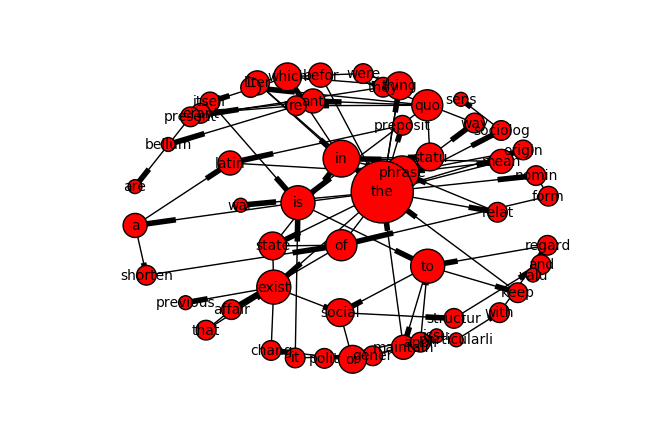

In [39]:
pos=nx.fruchterman_reingold_layout(G) #circular, random, shell, spring, spectral
d = nx.degree(G)
nx.draw(G,pos,nodelist=d.keys(), node_size=[v * 100 for v in d.values()])
nx.draw_networkx_labels(G,pos,nodelist=d.keys(),font_size=10)
nx.draw_networkx_edges(G,pos,width=0.1, edge_color='black')
plt.axis('off')
plt.show() # display